# Building the K-mer spectra from a genome

Write functions to:
1. Calculate k-mers from DNA sequences. Check it on a sequence with L=33 using k=21.How many kmers do you expect from it?
2. Calculate them directly from a FASTA file (example fastas provided)
3. Adapt the functions in a python program to plot the k-mer spectra of a fasta file. Apply this to a bacterial genome: https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/240/185/GCF_000240185.1_ASM24018v2/GCF_000240185.1_ASM24018v2_genomic.fna.gz


Information: the k-mer spectra is useful to understand the architecture and complexity of a genome

In [1]:
'''
To extract k-mers from DNA sequences, we walk over the sequence with a 1-bp sliding window.
Returns a list of all the kmers of the size input that are in the sequence.
'''

def build_kmers(sequence, ksize):
    # List to store the kmers
    kmers = [] 
    # Formula to calculate the number of kmers that will generated from the sequence
    n_kmers = len(sequence) - ksize + 1
    # Iterate over the number of kmers
    for i in range(n_kmers):
        # Select each kmer from the sequence using a sliding window of size ksize
        kmer = sequence[i:i + ksize]
        # Append the kmer to the list
        kmers.append(kmer)
    # Return the list of kmers
    return kmers

# Check. total 21-mers in a 33bp sequence are 13
build_kmers('ATGGACCAGATATAGGGAGAGCCAGGTAGGACA', 21)


['ATGGACCAGATATAGGGAGAG',
 'TGGACCAGATATAGGGAGAGC',
 'GGACCAGATATAGGGAGAGCC',
 'GACCAGATATAGGGAGAGCCA',
 'ACCAGATATAGGGAGAGCCAG',
 'CCAGATATAGGGAGAGCCAGG',
 'CAGATATAGGGAGAGCCAGGT',
 'AGATATAGGGAGAGCCAGGTA',
 'GATATAGGGAGAGCCAGGTAG',
 'ATATAGGGAGAGCCAGGTAGG',
 'TATAGGGAGAGCCAGGTAGGA',
 'ATAGGGAGAGCCAGGTAGGAC',
 'TAGGGAGAGCCAGGTAGGACA']

In [11]:
'''
Load our fasta as usual in this case a partial mitochondrial sequence of 2595bp. Have a look at the sequence 
and adapt the code accordingly to what you see.

Takes as an input a file name.
Returns a list of upercassed DNA sequences contained in the file. --> Because in the file the sequence contains
both uppercase letters and not.
'''

def load_sequence (file):
    # Convert the parsed sequences into a list
    from Bio import SeqIO
    seq_records=(list(SeqIO.parse(file, "fasta")))
    
    # Initialize an empty list to store the uppercased sequences
    upperseqList=[]
    
    # Iterate over the list of parsed sequences
    for T in seq_records:
        # Extract the sequence
        sequence = T.seq
        # Uppercase the extracted sequence
        sequence = sequence.upper()   
        # Append to the list
        upperseqList.append(str(sequence))
    # Return the uppercased sequences
    return (upperseqList)

load_sequence ("Theileria_2500bp.fa")

['TTTTTTTTTTTTTTATTTGCGTTGAAGTATATTTATTCCCTGTAACTCTTGGTTCTTGTGACGTTGTTTATCCTAGAGTTAATCTTTATAGTTTATTGCTTCAGCCTATAGGTTTTGGACTTGTTGTATCTTCTGTATTTCTTGAAGTTGGAAATGGAACTGGATGGACACTGTATCCTCCTCTGTCCACTTCAATTGCTAGCGCTGGAATTGATTTTATTATATTTGGTCTTTTATCTGCTGGAATAGCAAGTACACTAAGTAGCGTAAATTTTATAACAACTTTTACTTCTATTAAGGTTATTGGATTTGTTATAGATAGAATTCTGCCTATTGCTTGGTCAATTGTTTTAACTTCTTTCTTATTGCTTTTATCTTTGCCTGTCGTTACTGCTGTATTTTTGATGGTATTTTTCGACAGACATTATAATACTATGTTTTTTGAATCTTCTAATTCTGGAGATCCTGTATTATATCAACATTTATTTTGGTTTTTTGGACATCCAGAAGTATATATAATGATACTGCCTGGATTTGGTGTAATAAGTTTAATGCTATCTACTTTTGCTACTAAAGAAATGTTTGGAAATCAAACTATGATTTTAGCGATGGGTTCTATAGCTTTGTTAGGATGTTTAGTTTGGGGACATCATATGTACACTTCTGGATTAGAAGCAGACACTAGAGGTTATTTCACTACAGTTACAATACTTATTTCTTTACCAACTGGAAATAAAGTATTTAATTGGGTAACAACTTTACAAGGTGCAACTACAGTTAGAAATATTGGAGTTGTGGTTTTCGGATTTTTATTTGTTATAAATTTTGTAATTGGAGGAACAACTGGAGTTGTTTTAGGTAATGCTGGTGTTGATATAGCTTTACATGATACTGTATATGTTGTTGGACATTTTCATTTTGTATTGTCAATAGGAGCTATAACATCATTGCTATGTTACATAATGTATATTCAAAGAATGTTATATGGTGTTATATTT

In [13]:
'''
Print the length of each sequence of the fasta file and the first 10 amino acids of each sequence
'''

for S in (load_sequence("plant_contaminants.fa")):
    print ("Length:",len(S),"Seq:", S[0:10])

Length: 562643 Seq: CCCACACACA
Length: 230218 Seq: CCACACCACA
Length: 316620 Seq: CCCACACACC
Length: 576874 Seq: CGTCTCCTCC
Length: 270161 Seq: GATCTCGCAA
Length: 439888 Seq: CACACACACC
Length: 745751 Seq: CCCACACACA
Length: 666816 Seq: CACCACACCC
Length: 268986 Seq: TAACCCTAAC
Length: 384502 Seq: TAACCCTAAC
Length: 40291 Seq: GCGGAAGATG
Length: 355712 Seq: TTAACCCTAA
Length: 472852 Seq: CCTAACCCTA
Length: 465823 Seq: CTAACCCTAA
Length: 516869 Seq: CCTAACCCTA
Length: 596352 Seq: CCCTAACCTA
Length: 574960 Seq: TAACCCTAAC
Length: 573434 Seq: AACCCTAACC
Length: 570865 Seq: CTAACCCTAA
Length: 582573 Seq: CTAACCCTAA
Length: 675346 Seq: CCCTAACCCT
Length: 654595 Seq: TACCCTAACC
Length: 622644 Seq: AACCCTAACC
Length: 629517 Seq: ACCCTAACCC
Length: 714651 Seq: AACCCTAACC
Length: 684829 Seq: GGTTAGGGTT
Length: 739748 Seq: CCTAACCCTA
Length: 702208 Seq: AACCCTAACC
Length: 742537 Seq: CCCTAACCCT
Length: 716602 Seq: TAACCCTAAC
Length: 109570 Seq: TATTACCAGT
Length: 21875 Seq: TGCTTGATAA
Length: 32

In [21]:
'''
The input is a fasta file and an integer value that is the size of the kmers
'''

def read_kmers_from_file(fasta, ksize):
    # List to store all the kmers we obtain
    all_kmers = [] 
    for sequence in fasta:
        # Kmers are the kmers we obtain of each sequence with the build_kmers() function
        kmers = build_kmers(sequence, ksize)
        # Add the kmers to the list
        all_kmers += kmers
    # Print the list
    return all_kmers

read_kmers_from_file((load_sequence ("read.fasta")), 115)

['CTCACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATG',
 'TCACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATGG',
 'CACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATGGT',
 'ACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATGGTG',
 'CATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATGGTGT',
 'ATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCTCCACATGGTGTT']

In [22]:
'''
PLOT

Function that takes in a fasta file and a k-mer size and retursn a plot of the k-mer spectra.
'''

def kmer_spectra_from_file(fasta, ksize):
    # Initializes an empty list that will store all the k-mers from the fasta file
    all_kmers = []
    
    # Iterates over the sequences of the file
    for sequence in fasta:
        # For each sequence calls the build_kmers() function to generate all the kmers of the given size
        kmers = build_kmers(sequence, ksize)
        # Add these kmers to the list
        all_kmers += kmers
        
    '''  
    Calculate the number of occurrences counts of each kmer
    ''' 
    # Dictionary to store the counts of each k-mer
    kmultiplicity = {}
    
    # Iterate over the k-mers
    for i in all_kmers:
        # Convert it to a string and check if it already exist in the dictionary
        if str(i) in kmultiplicity.keys():
            # If it does, we increment the count
            kmultiplicity[str(i)] += 1;
        else:
            # If it doesn't, a new key is added to the dictionary with a count of 1
            kmultiplicity[str(i)] = 1;
     
    '''
    Write kmer multiplicities into a temporary csv file
    Opens a temporary csv file and writes the k-mer counts from the dictionary to the file.
    '''
    import csv
    with open('temp.csv', 'w') as f:
        for key in kmultiplicity.keys():
            f.write("%s,%s\n"%(key,kmultiplicity[key]))
         
    
    '''
    Do the plot
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Read the temporary csv file into a data frame with columns "kmer" and "counts"
    spectra_df = pd.read_csv('temp.csv', names = ["Kmer", "Counts"])
      
    # Groups the data frame by k-mer count and adds a new column "frequency" that stores the number of unique 
    # k-mers with each count
    spectra_df['Frequency'] = spectra_df.groupby('Counts')['Kmer'].transform('size')
    
    # Generates a scatter plot of k-mer frequency versus k-mer count or multiplicity
    plt.scatter(x = spectra_df.Counts, y = spectra_df.Frequency ,s = 1)
    
    # Names of the axis
    plt.xlabel('Kmer Count (or multiplicity)')
    plt.ylabel('Kmer Frequency')
    plt.title('Kmer Spectra')
    


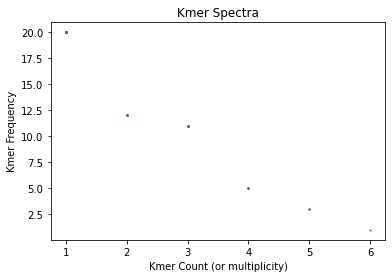

In [23]:
kmer_spectra_from_file(load_sequence("read.fasta"), 3)

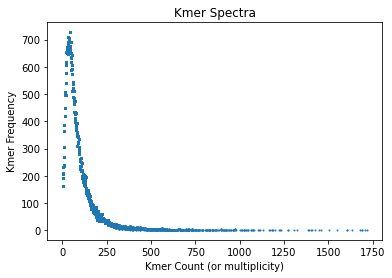

In [24]:
kmer_spectra_from_file(load_sequence("GCF_000240185.1_ASM24018v2_genomic.fasta"), 8)